In [2]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download 'moltean/fruits'

 99% 1.27G/1.28G [00:07<00:00, 234MB/s]
100% 1.28G/1.28G [00:07<00:00, 191MB/s]


In [ ]:
!unzip fruits.zip

In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = [224, 224]

In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [8]:
for layer in vgg.layers:
  layer.trainable = False

In [9]:
folders = glob('/content/fruits-360_dataset/fruits-360/Training/*')

In [10]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
model = Model(inputs=vgg.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_image = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_image = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_image.flow_from_directory('/content/fruits-360_dataset/fruits-360/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 67692 images belonging to 131 classes.


In [16]:


test_set = test_image.flow_from_directory('/content/fruits-360_dataset/fruits-360/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 22688 images belonging to 131 classes.


In [17]:
model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
2116/2116 [==============================] - 907s 422ms/step - loss: 0.4684 - accuracy: 0.8951 - val_loss: 0.4504 - val_accuracy: 0.9055
Epoch 2/10
2116/2116 [==============================] - 878s 415ms/step - loss: 0.2002 - accuracy: 0.9582 - val_loss: 0.6776 - val_accuracy: 0.9063
Epoch 3/10
2116/2116 [==============================] - 873s 413ms/step - loss: 0.1356 - accuracy: 0.9734 - val_loss: 0.3010 - val_accuracy: 0.9511
Epoch 4/10
2116/2116 [==============================] - 871s 412ms/step - loss: 0.1340 - accuracy: 0.9770 - val_loss: 0.5518 - val_accuracy: 0.9339
Epoch 5/10
2116/2116 [==============================] - 871s 412ms/step - loss: 0.1047 - accuracy: 0.9814 - val_loss: 0.4357 - val_accuracy: 0.9534
Epoch 6/10
2116/2116 [==============================] - 870s 411ms/step - loss: 0.0944 - accuracy: 0.9850 - val_loss: 0.5248 - val_accuracy: 0.9514
Epoch 7/10
2116/2116 [==============================] - 868s 410ms/step - loss: 0.0876 - accuracy: 0.9860 - val_

In [19]:
model.save("/content/drive/MyDrive/models/fruit360.h5")


In [29]:
img = image.load_img('/content/9.jpg',target_size=(224,224))

In [30]:
array = image.img_to_array(img)

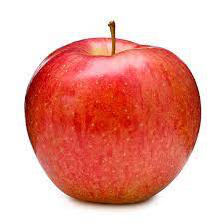

In [31]:
img

In [32]:
img_tensor =np.expand_dims(img,axis=0)
model.predict(img_tensor)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)